In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('historical_data.csv')
print(df.head(3))

   transaction_id transaction_date transaction_time  transaction_qty store_id  \
0               1       2024-01-01         07:06:11                2      ST2   
1               2       2024-01-01         07:08:56                2      ST2   
2               3       2024-01-01         07:14:04                2      ST2   

   product_id  unit_price  
0          32         3.0  
1          57         3.1  
2          59         4.5  


In [134]:
df['transaction_date'] = pd.to_datetime(
    df['transaction_date'], format='%Y-%m-%d')

In [135]:
qunatity_sum_df = df.groupby(['store_id', 'product_id', 'transaction_date']).agg({
    "transaction_qty": "sum"}).reset_index()
qunatity_sum_df.to_csv('quantity_sum.csv', index=False)

In [136]:
quntity_sum_sorted_by_date_df = qunatity_sum_df.sort_values(['transaction_date', 'store_id', 'product_id']).reset_index(drop=True)
quntity_sum_sorted_by_date_df = quntity_sum_sorted_by_date_df.reindex(
    ['transaction_date', 'store_id', 'product_id', 'transaction_qty'], axis=1)
quntity_sum_sorted_by_date_df.to_csv('quntity_sum_sorted_by_date.csv', index=False)

In [137]:
# Create a DataFrame with all combinations of dates, store-ids, and product_ids
all_combinations = pd.DataFrame(
    index=pd.MultiIndex.from_product([
        pd.date_range(start='2024-01-01', end='2024-05-31'),
        ['ST1', 'ST2', 'ST3'],
        range(1, 88)  # product_ids from 1 to 87
    ], names=['transaction_date', 'store_id', 'product_id'])
).reset_index()

In [138]:
# Merge with the original DataFrame
quntity_sum_sorted_by_date_complete_df = pd.merge(
    all_combinations,
    quntity_sum_sorted_by_date_df,
    on=['transaction_date', 'store_id', 'product_id'],
    how='left'
)

# Fill missing values
quntity_sum_sorted_by_date_complete_df['transaction_qty'].fillna(
    0, inplace=True)
# merged_df['transaction_id'].apply(lambda x: [] if pd.isnull(x) else x)


In [139]:
all_combinations

,transaction_date,store_id,product_id
0,2024-01-01,ST1,1
1,2024-01-01,ST1,2
2,2024-01-01,ST1,3
3,2024-01-01,ST1,4
4,2024-01-01,ST1,5
...,...,...,...
39667,2024-05-31,ST3,83
39668,2024-05-31,ST3,84
39669,2024-05-31,ST3,85
39670,2024-05-31,ST3,86


In [140]:
# Create new feature column 'day_of_week'
quntity_sum_sorted_by_date_complete_df['day_of_week'] = quntity_sum_sorted_by_date_complete_df['transaction_date'].dt.dayofweek
print(quntity_sum_sorted_by_date_complete_df.head(3))
quntity_sum_sorted_by_date_complete_df.to_csv(
    'quntity_sum_sorted_by_date_complete.csv', index=False)

  transaction_date store_id  product_id  transaction_qty  day_of_week
0       2024-01-01      ST1           1              0.0            0
1       2024-01-01      ST1           2              0.0            0
2       2024-01-01      ST1           3              0.0            0


In [141]:
# unique_records = df[['store_id', 'product_id']].drop_duplicates().sort_values(['store_id', 'product_id']).reset_index(drop=True)
# print(unique_records[:])
# unique_records.to_csv('sorted.csv', index=False)

In [142]:
# grouped_by_day = df.groupby(['store_id', 'product_id', 'transaction_date']).sum(
#     "transaction_qty")
# grouped_by_day.to_csv('grouped.csv', index=False)

In [143]:
# grouped_by_day_2 = df.groupby(['transaction_date', 'store_id', 'product_id' ]).agg({
#     "transaction_qty": "sum",
#     "transaction_id": list
# }).reset_index()

# grouped_by_day_2.to_csv('grouped_2.csv', index=False)

In [144]:
unique_dates = quntity_sum_sorted_by_date_complete_df[[
    'transaction_date']].drop_duplicates().values

In [155]:
unique_dates[:5]

array([['2024-01-01T00:00:00.000000000'],
       ['2024-01-02T00:00:00.000000000'],
       ['2024-01-03T00:00:00.000000000'],
       ['2024-01-04T00:00:00.000000000'],
       ['2024-01-05T00:00:00.000000000']], dtype='datetime64[ns]')

In [152]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt


# Split the dates into 80:20 train and test sets
train_dates, test_dates = train_test_split(
    unique_dates, test_size=0.2, shuffle=False)

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\Panamgama\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [146]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# for date in train_dates:
#     next_day_index = np.where(unique_dates == date)[0][0] + 1
#     print( np.where(unique_dates == date))
#     print(next_day_index)

In [163]:
# Initialize an empty list to store the loss values
losses = []

# For each date in the training set
for date in train_dates:
    # Get the "transaction_qty" and "day_of_week" columns
    records = quntity_sum_sorted_by_date_complete_df[(
        quntity_sum_sorted_by_date_complete_df['transaction_date'] == date[0])][['transaction_qty', 'day_of_week']]

    # Reshape the data into a (n, 2) array
    data = records.values.reshape((records.shape[0], 1, 2))

    # Get the "transaction_qty" of the next day
    next_day_index = np.where(unique_dates == date)[0][0] + 1
    if next_day_index < len(unique_dates):
        next_day_date = unique_dates[next_day_index][0]
        next_day_record = quntity_sum_sorted_by_date_complete_df[(
            quntity_sum_sorted_by_date_complete_df['transaction_date'] == next_day_date)]['transaction_qty']
        target = next_day_record.values

        # Feed the data into the LSTM model and get the history
        history = model.fit(data, target, epochs=5, verbose=0)
        
        # Append the loss to the losses list
        losses.append(history.history['loss'][0])


# Now the model is trained and can be used to predict the "transaction_qty" of the next day

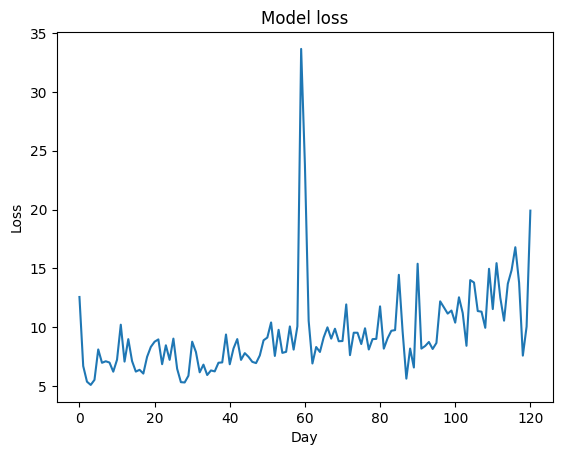

In [164]:
# Plot the losses
plt.plot(losses)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Day')
plt.show()

In [166]:
from sklearn.metrics import mean_squared_error

# Initialize a list to store the predictions
predictions = []

# For each date in the test set
for date in test_dates:
    # Get the "transaction_qty" and "day_of_week" columns
    records = quntity_sum_sorted_by_date_complete_df[(
        quntity_sum_sorted_by_date_complete_df['transaction_date'] == date[0])][['transaction_qty', 'day_of_week']]

    # Reshape the data into a (n, 2) array
    data = records.values.reshape((records.shape[0], 1, 2))

    # Use the LSTM model to predict the "transaction_qty" of the next day
    prediction = model.predict(data)

    # Append the prediction to the list
    predictions.append(prediction)

# Convert the list of predictions to a numpy array
predictions = np.array(predictions)

# Get the actual "transaction_qty" values of the next day for the test dates
actuals = []
for date in test_dates:
    next_day_index = np.where(unique_dates == date)[0][0] + 1
    if next_day_index < len(unique_dates):
        next_day_date = unique_dates[next_day_index][0]
        next_day_record = quntity_sum_sorted_by_date_complete_df[(
            quntity_sum_sorted_by_date_complete_df['transaction_date'] == next_day_date)]['transaction_qty']
        actual = next_day_record.values
        actuals.append(actual)
actuals = np.array(actuals)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
9/9 ━━━━━━

In [167]:
print(actuals.shape)
print(predictions.reshape(31, 261)[:30].shape)
predictions_reshaped = np.round(predictions.squeeze())[:30]
print(predictions_reshaped.shape)
# print(predictions_reshaped[0])
print(actuals[0])
print(predictions_reshaped[0])

(30, 261)
(30, 261)
(30, 261)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 14. 19. 12. 13. 10. 15. 10. 20.  9. 10. 12. 12.  2.  3. 17.
 14.  9. 10. 19.  3. 10. 13. 15. 14. 16. 19.  5.  8. 18. 22. 12. 24. 12.
 12.  8.  5. 11. 13.  5. 20.  0.  0.  0.  0.  0.  0.  0.  4.  4.  8.  5.
  7.  8.  4.  6.  9.  4. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 11.  6.  5. 13. 12.  8.  9.  9.  5. 14. 10.  7. 11.  4.  3. 13.  9.  7.
  6.  6. 15.  5. 12.  2.  9. 18.  9.  4.  5. 12.  6.  9. 10. 15.  5. 15.
  9. 11. 11. 10.  0.  0.  0.  0.  0.  0.  0.  6.  2.  3.  2.  1.  5.  9.
  2.  5.  4.  6.  0.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9. 12.  4.
  9. 14. 12. 12.  6. 11. 14. 17. 17. 16. 10. 12. 12.  6.  8. 10.  9.  9.
 14. 20.  9. 17.  8.  9. 13. 17.  8. 15. 18. 11. 18. 11.  7.  7. 16.  7.
 13.  0.  0.  0.  0. 

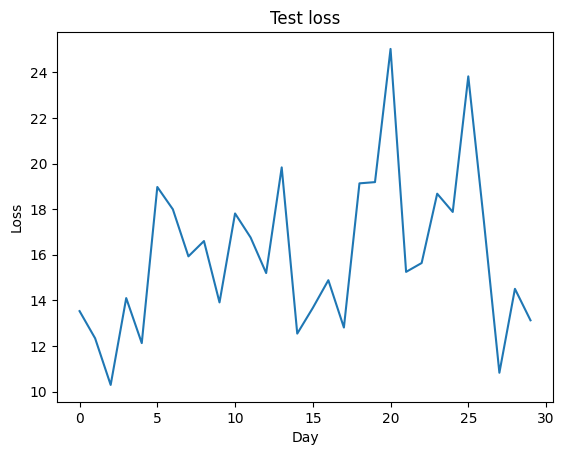

In [168]:
# Calculate the MSE for each prediction
test_losses = [mean_squared_error(y_true, y_pred)
               for y_true, y_pred in zip(actuals, predictions)]

# Plot the test losses
plt.plot(test_losses)
plt.title('Test loss')
plt.ylabel('Loss')
plt.xlabel('Day')
plt.show()

In [151]:
# for date in unique_dates:
#     records = quntity_sum_sorted_by_date_complete_df[(quntity_sum_sorted_by_date_complete_df['transaction_date'] == date[0])]

#     print(records)
#     records.to_csv('record_1.csv', index=False)
    # insert data to model here
    # break



    # print(store_id, product_id)



    # print(records.loc[:, ['transaction_qty']])



    # Now 'records' is a DataFrame containing all records for the current 'store_id', 'product_id' pair



    # You can now convert 'records' into a suitable format and feed it into your RNN